In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import datasets

## Preparations

### File reading

In [2]:
if 'plots' in os.getcwd():
    print("cwd is correct")
else:
    MYDIR = ("plots")
    os.chdir("../")
    CHECK_FOLDER = os.path.isdir(MYDIR)
    ## If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        print(MYDIR, "folder already exists.")

os.chdir("plots/")
print("current directroy is: ", os.getcwd())

plots folder already exists.
current directroy is:  /media/hmk/Galeri/Files/Projects/Multi_Agents_Area_Exploration/analysing_data/plots


In [4]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data_save/small_dataframes_for_testing/2/all_data.csv")

### Adding an extra column

In [5]:
df_all['method_abbr'] = df_all['method'].apply(lambda x: ''.join([str(i[0]) for i in x.split('_')]))
df_all['method_abbr']

0         FC
1         FC
2         FC
3         FC
4         FC
        ... 
2343    VFHC
2344    VFHC
2345    VFHC
2346    VFHC
2347    VFHC
Name: method_abbr, Length: 2348, dtype: object

### Some small analysis over data

In [6]:
df_all.shape

(2348, 28)

In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2348 entries, 0 to 2347
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2348 non-null   int64  
 1   area_percent    2348 non-null   float64
 2   update_time     2348 non-null   float64
 3   delta_time      2348 non-null   float64
 4   plan_length     2348 non-null   int64  
 5   replan_count    2348 non-null   int64  
 6   logging_time    2348 non-null   float64
 7   frame_count     2348 non-null   int64  
 8   known_area      2348 non-null   int64  
 9   success         2348 non-null   bool   
 10  seed            2348 non-null   int64  
 11  draw_sim        2348 non-null   bool   
 12  log_plots       2348 non-null   bool   
 13  use_threads     2348 non-null   bool   
 14  n_bots          2348 non-null   int64  
 15  PYG_GRID_CELL_THICKNESS  2348 non-null   int64  
 16  screen_width    2348 non-null   int64  
 17  screen_height   2348 non

In [8]:
df_all.columns

Index(['Unnamed: 0', 'area_percent', 'update_time', 'delta_time',
       'plan_length', 'replan_count', 'logging_time', 'frame_count',
       'known_area', 'success', 'seed', 'draw_sim', 'log_plots', 'use_threads',
       'n_bots', 'PYG_GRID_CELL_THICKNESS', 'screen_width', 'screen_height',
       'min_room_size', 'max_room_size', 'wall_ratio', 'method',
       'start_scenario', 'goal_scenario', 'experiment_ID', 'loss_type',
       'execution_date', 'method_abbr'],
      dtype='object')

In [9]:
# df_all[df_all['method_abbr']=='F.C.']

In [10]:
df_all['experiment_ID'].unique()

array([1, 0, 3, 2, 5, 4, 7, 6])

In [11]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)

i:  0 Method:  ('FC', 'Edge_Start_Goal') Group:  (585, 28)
i:  1 Method:  ('FC', 'Top_Left_Start_Goal') Group:  (760, 28)
i:  2 Method:  ('UR', 'Rand_Start_Goal') Group:  (691, 28)
i:  3 Method:  ('VFHC', 'Distributed_Goal') Group:  (312, 28)


## Average line plot for VFHC method

In [12]:
vfhc_data = df_all[(df_all['method_abbr']=='V.F.H.C.')]
vfhc_data.shape

(0, 28)

In [13]:
# SHOW WHAT IS INSIDE THE DATAFRAME
# vfhc_data

In [14]:
for i,[method, group] in enumerate(vfhc_data.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)

In [15]:
pd.options.display.max_rows = 4000

In [16]:
vfhc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      0 non-null      int64  
 1   area_percent    0 non-null      float64
 2   update_time     0 non-null      float64
 3   delta_time      0 non-null      float64
 4   plan_length     0 non-null      int64  
 5   replan_count    0 non-null      int64  
 6   logging_time    0 non-null      float64
 7   frame_count     0 non-null      int64  
 8   known_area      0 non-null      int64  
 9   success         0 non-null      bool   
 10  seed            0 non-null      int64  
 11  draw_sim        0 non-null      bool   
 12  log_plots       0 non-null      bool   
 13  use_threads     0 non-null      bool   
 14  n_bots          0 non-null      int64  
 15  PYG_GRID_CELL_THICKNESS  0 non-null      int64  
 16  screen_width    0 non-null      int64  
 17  screen_height   0 non-null      int64 

In [17]:
unique =  set(vfhc_data.frame_count.unique())
# SHOW UNIQUE VALUES OF THE frame_count COLUMN
unique

set()

In [18]:
for i,[method, group] in enumerate(vfhc_data.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    data = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data["area_percent"] = 1
    new_data = pd.concat([group, data]).sort_values(["experiment_ID", "frame_count"])

In [19]:
unique =  set(vfhc_data.frame_count.unique())
data = vfhc_data.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
data["area_percent"] = 1
new_data = pd.concat([vfhc_data, data]).sort_values(["experiment_ID", "frame_count"])
# new_data


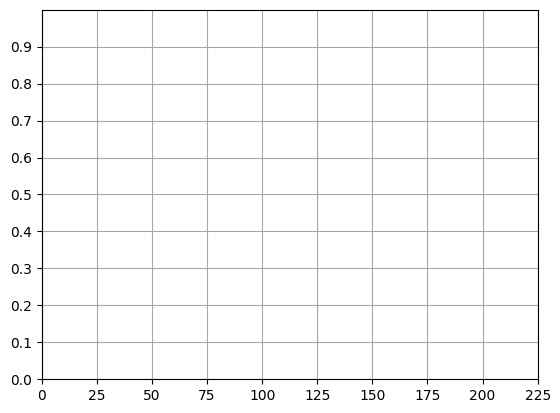

In [20]:
count_group = new_data.groupby(['frame_count'])
sns.lineplot(x="frame_count", y="area_percent", data=new_data, label=method)
plt.xticks(np.arange(0, 250, step=25))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(True, which="both", ls="-", color='0.65')

## Average line plotting for all 4 different methods

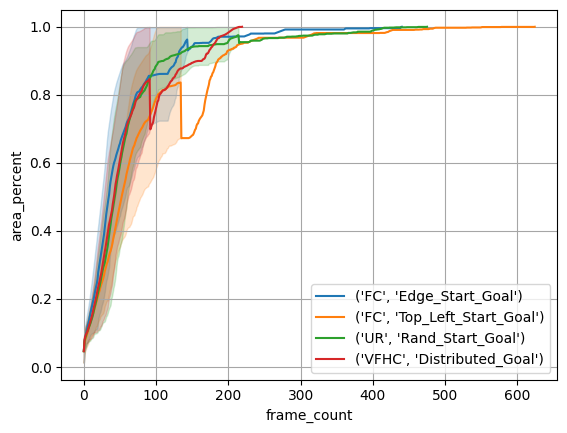

In [23]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    # print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=group, label=method)


# plt.ylim(0.6, 1)
# plt.xlim(80,150)
plt.xlabel('frame_count')
plt.ylabel('area_percent')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# plt.tight_layout()
plt.grid(True, which="both", ls="-", color='0.65')
plt.savefig(f"1_frame_count_vs_area_percent_without_fix.png", bbox_inches='tight', dpi=300)

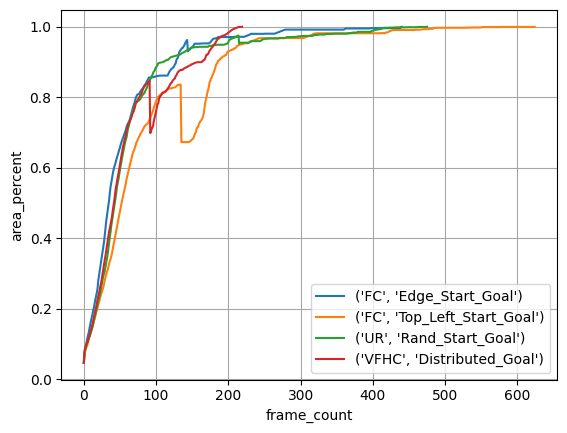

In [24]:
# SHOW ONLY THE MEAN LINES
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    count_group = group.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

plt.xlabel('frame_count')
plt.ylabel('area_percent')
plt.grid(True, which="both", ls="-", color='0.65')
plt.savefig(f"1_frame_count_vs_area_percent_mean_without_fix.png", bbox_inches='tight', dpi=300)

i:  0 Method:  ('FC', 'Edge_Start_Goal') Group:  (585, 28)
i:  1 Method:  ('FC', 'Top_Left_Start_Goal') Group:  (760, 28)
i:  2 Method:  ('UR', 'Rand_Start_Goal') Group:  (691, 28)
i:  3 Method:  ('VFHC', 'Distributed_Goal') Group:  (312, 28)


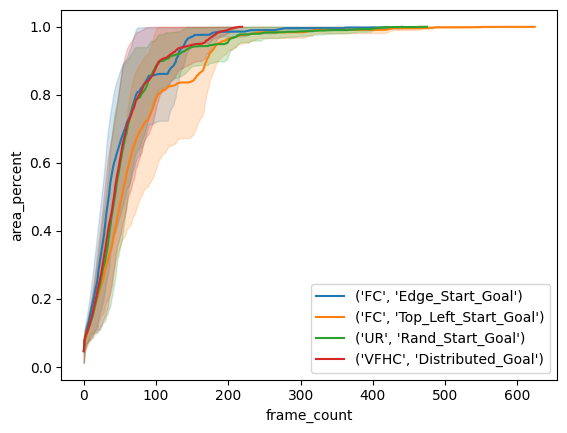

In [26]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    # print(unique)
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    # data2
    # break
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])
    
    count_group = new_data.groupby(['frame_count'])
    sns.lineplot(x="frame_count", y="area_percent", data=new_data, label=method)

plt.savefig(f"2_frame_count_vs_area_percent_after_fix.png", bbox_inches='tight', dpi=300)
    

i:  0 Method:  ('FC', 'Edge_Start_Goal') Group:  (585, 28)
i:  1 Method:  ('FC', 'Top_Left_Start_Goal') Group:  (760, 28)
i:  2 Method:  ('UR', 'Rand_Start_Goal') Group:  (691, 28)
i:  3 Method:  ('VFHC', 'Distributed_Goal') Group:  (312, 28)


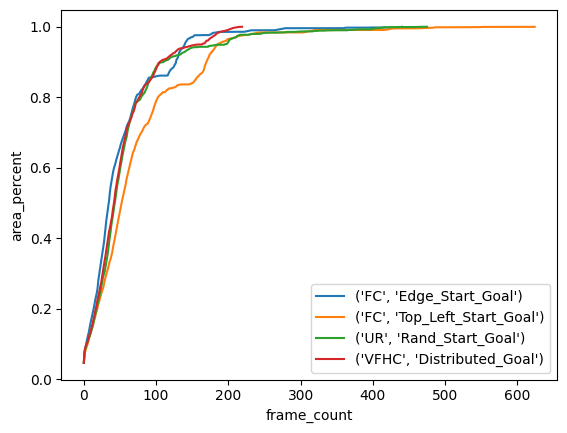

In [151]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr', 'goal_scenario'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    count_group = group.groupby(['frame_count'])
    unique =  set(group.frame_count.unique())
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    data2["area_percent"] = 1
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])

    count_group = new_data.groupby(['frame_count'])
    x_data = count_group['area_percent'].mean()
    sns.lineplot(x_data, label=method)

plt.savefig(f"2_frame_count_vs_area_percent_mean_after_fix.png", bbox_inches='tight', dpi=300)
    

In [80]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

i:  0 Method:  FC Group:  (1345, 28)
i:  1 Method:  UR Group:  (691, 28)
i:  2 Method:  VFHC Group:  (312, 28)


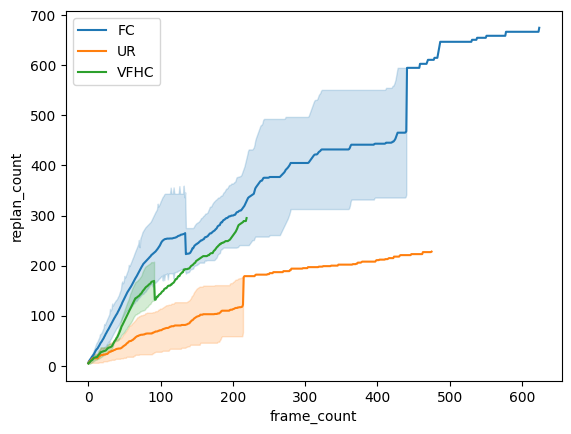

In [148]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    sns.lineplot(x="frame_count", y="replan_count", data=group, label=method)
plt.savefig(f"2_frame_count_vs_replan_count_after_fix.png", bbox_inches='tight', dpi=300)

i:  0 Method:  FC Group:  (1345, 28)
i:  1 Method:  UR Group:  (691, 28)
i:  2 Method:  VFHC Group:  (312, 28)


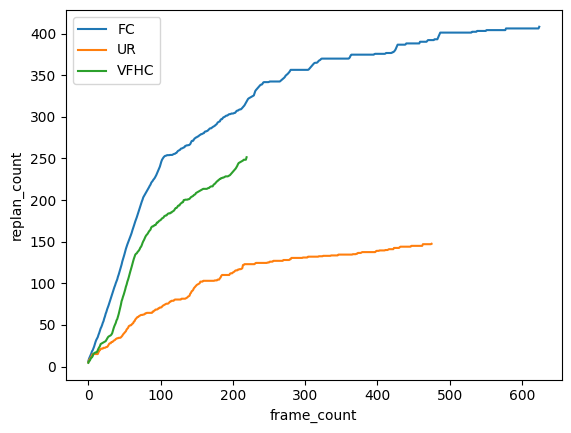

In [154]:
for i,[method, group] in enumerate(df_all.groupby(['method_abbr'])):
    print("i: ", i, "Method: ", method, "Group: ", group.shape)
    group_counts = group.groupby('experiment_ID')['replan_count'].apply(lambda x: x.iloc[-1])
    # print(group_counts.values)


    # last_replan_count = group_counts.values[-1]
    # print("skdjaskldjaskld", last_replan_count)
    unique =  set(group.frame_count.unique())
    # print(unique)
    
    data2 = group.groupby("experiment_ID").agg({"frame_count":lambda x: unique - set(x)}).explode("frame_count").dropna().reset_index()
    # print(data2.shape)

    
    for j in group_counts.index:
        data2.loc[data2.experiment_ID == j, "replan_count"] = group_counts[j]

    
    new_data = pd.concat([group, data2]).sort_values(["experiment_ID", "frame_count"])
    
    count_group = new_data.groupby(['frame_count'])
    x_data = count_group['replan_count'].mean()
    sns.lineplot(x_data, label=method)
    # break
# plt.xlim(438, 443)
# plt.ylim(380, 400)
plt.savefig(f"2_frame_count_vs_replan_count_after_fix.png", bbox_inches='tight', dpi=300)